In [ ]:
#modo de abrir os arquivos parquet (engine)
!pip install pyarrow 
#biblioteca para manipulação e visualização dos dados em formato "tabelar"
import pandas as pd
# importando numpy para manipulações matemáticas
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [ ]:
%cd /content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sia_pa/

/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sia_pa


### QUANTIDADE DE ARQUIVOS PARQUET NO DIRETÓRIO

In [ ]:
!ls -1 | wc -l

5251


[documentação sia_pa](https://drive.google.com/file/d/1rdzxvIZyNI7l50E9j0fOLKgRvx5iqcGU/view)

### VERIFICANDO QUAIS ARQUIVOS E QUANTAS LINHAS DE CADA ARQUIVO PARQUET CONTÉM ALGUM DADO ONDE O DIAGNÓSTICO PRINCIPAL FOI 'L20' E SUAS DERIVAÇÕES

In [ ]:
%%time
array_arquivos = os.listdir('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sia_pa/')
arquivos_com_l20 = []

for arquivo_parquet in array_arquivos:
  df_sia = pd.read_parquet(arquivo_parquet, engine='pyarrow')
  df_sia_custo = df_sia.astype({'PA_CIDPRI': str,'PA_VALPRO': float,'PA_QTDPRO': int})

  shape_linhas = df_sia_custo[df_sia_custo['PA_CIDPRI'].str.contains('L20')].shape[0]
  dataframe = df_sia_custo[df_sia_custo['PA_CIDPRI'].str.contains('L20')]

  if shape_linhas != 0:
    arquivos_com_l20.append({arquivo_parquet : shape_linhas})

CPU times: user 3h 23min 25s, sys: 20min 10s, total: 3h 43min 35s
Wall time: 3h 16min 52s


In [ ]:
len(arquivos_com_l20) # temos 3921 arquivos contendo L20

3921

# SALVEI O NOME DO ARQUIVO E QUANTAS LINHAS O DATAFRAME POSSUI:

In [ ]:
# OLHANDO NOME DO ARQUIVO E QUANTAS LINHAS EM CADA ARQUIVO. OS 3 PRIMEIROS ARQUIVOS, POR EXEMPLO:
arquivos_com_l20[0:3]

[{'part-04251-3c6f499e-a06e-4ae5-99a2-041c0cba3b71-c000.snappy.parquet': 1},
 {'part-04252-3c6f499e-a06e-4ae5-99a2-041c0cba3b71-c000.snappy.parquet': 14},
 {'part-04256-3c6f499e-a06e-4ae5-99a2-041c0cba3b71-c000.snappy.parquet': 18}]

### MONTANDO UM ARRAY QUE CONTÉM TODOS OS DF'S COM ESSES DADOS E CONCATENANDO PARA QUE TENHAMOS UMA TABELA ÚNICA SOMENTE DE 'L20'

In [ ]:
%%time
array_arquivos = os.listdir('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sia_pa/')
df_l20_sia = []

for arquivo_parquet in array_arquivos:
  df_sia = pd.read_parquet(arquivo_parquet, engine='pyarrow')
  df_sia = df_sia.astype({'PA_CIDPRI': str,'PA_VALPRO': float,'PA_QTDPRO': int})

  shape_linhas = df_sia[df_sia['PA_CIDPRI'].str.contains('L20')].shape[0]
  dataframe = df_sia[df_sia['PA_CIDPRI'].str.contains('L20')]

  if shape_linhas != 0:
    df_l20_sia.append(dataframe)

CPU times: user 3h 25min 47s, sys: 19min 4s, total: 3h 44min 51s
Wall time: 2h 12min 42s


### QUANTOS DATAFRAMES VOU CONCATENAR? 

- precisa ser igual ao len dos arquivos que contém l20 (len=3921)

In [ ]:
len(df_l20_sia)

3921

In [ ]:
DF_L20_SIA = pd.concat(df_l20_sia)

In [ ]:
#DF_L20_SIA.to_csv("DF_L20_SIA.csv", index=False) 
# gerando csv SIA

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

## PODEMOS RODAR SOMENTE A PARTIR DAQUI, O CSV GERADO SOMENTE COM DADOS DO L20 ESTÁ NA RAIZ DATATHON_EINSTEIN

*   Se quiser rodar as célular anteriores para gerar esse mesmo csv que estamos utilizando abaixo, descomentar a linha demarcada como "gerando csv SIA" acima



In [1]:
#modo de abrir os arquivos parquet (engine)
!pip install pyarrow 
#biblioteca para manipulação e visualização dos dados em formato "tabelar"
import pandas as pd
# importando numpy para manipulações matemáticas
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import csv
import os

### TEMOS 46150 ENTRADAS QUE CONSTAM L20 NESSE GRANDE DATAFRAME



*   Gerar o csv não seria a melhor conduta considerando a dimensão do database, porém o tempo de execução para filtramos diferentes combinações de cid's é alto, considerando estes pontos e que estamos trabalhando via colab pro, decidimos por esta abordagem.



In [2]:
%cd /content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/

/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN


In [3]:
# abrir o csv gerado com pandas

DF_L20_SIA = pd.read_csv("DF_L20_SIA.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
DF_L20_SIA.shape

(46150, 60)

In [5]:
DF_L20_SIA.head(2)

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,2714132,260890,PG,260890,0,0,0,2,0,M,11097292000149,11097292000149,0,201704,201704,301010064,1,0,1,I,0000000000000,102678618150018,225142,0,0,0,0,0,0,L20,0,0,1,43,0,130,1,F,4,260890,1,1,0.00,0.00,0,0,0.0,0.0,0.00,5,1,K,0,NaN,0.0,10.0,0.0,NaN,NaN,1244
1,2306344,420890,PG,420890,0,0,0,5,0,M,84433945000278,84433945000197,0,201806,201806,301060029,6,0,2,I,0000000000000,170512166330005,225124,0,0,0,0,0,0,L209,0,0,2,3,0,130,1,M,1,420890,1,1,12.47,12.47,0,0,0.0,0.0,12.47,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999


### TRANSFORMANDO OS TIPOS DE DADOS DE VALORES EM FLOAT PARA FACILITAR OPERAÇÕES ARITMÉTICAS

In [6]:
cols_interesse = ['PA_QTDPRO','PA_VALPRO', 'PA_CIDPRI', 'PA_PROC_ID', 
                  'PA_NIVCPL', 'PA_DOCORIG', 'PA_MUNPCN', 'PA_IDADE', 
                  'PA_CMP', 'PA_RACACOR', 'PA_SEXO', 'PA_UFDIF', 
                  'PA_QTDAPR', 'PA_VALAPR']

In [7]:
DF_L20_SIA = DF_L20_SIA[cols_interesse].astype({'PA_IDADE': int,'PA_VALAPR': float,'PA_PROC_ID': int, 'PA_QTDAPR': int})

## verificando as tabelas do sigtap (tb_sigtap_procedimento)

In [8]:
df_siftap_cid = pd.read_parquet('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/sigtap_cid_part-00000-58b508dc-6dbc-4fbf-a365-09d87bf87110-c000.snappy.parquet', engine='pyarrow')

In [9]:
df_siftap_cid.head(2)

,CO_CID,NO_CID,TP_AGRAVO,TP_SEXO,TP_ESTADIO,VL_CAMPOS_IRRADIADOS
0,A00,Cólera,0,I,N,000
1,A000,"Cólera devida a Vibrio Cholerae 01, biótipo Ch...",2,I,N,000


In [10]:
df_sigtap_proc0 = pd.read_parquet('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/sigtapproc_part-00000-c4fb50db-777b-4088-a8c1-a6d07675ee92-c000.snappy.parquet', engine='pyarrow')
df_sigtap_proc1 = pd.read_parquet('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/sigtapproc_part-00001-c4fb50db-777b-4088-a8c1-a6d07675ee92-c000.snappy.parquet', engine='pyarrow')
df_sigtap_proc2 = pd.read_parquet('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/sigtapproc_part-00002-c4fb50db-777b-4088-a8c1-a6d07675ee92-c000.snappy.parquet', engine='pyarrow')

# verificando o tamanho dos arquivos
print(df_sigtap_proc0.shape)
print(df_sigtap_proc1.shape)
print(df_sigtap_proc0.shape)

(129609, 16)
(127824, 16)
(129609, 16)


## retornando uma lista com todos os procedimentos únicos encontrados na tabela sia_pa


In [11]:
procedimentos_id = DF_L20_SIA.groupby(['PA_PROC_ID']).count()
procedimentos_id = list(procedimentos_id.index)
len(procedimentos_id)

252

## transformando a coluna de código de procedimentos para tipo inteiro - no sigtap


In [12]:
df_sigtap_proc0['CO_PROCEDIMENTO'] = df_sigtap_proc0['CO_PROCEDIMENTO'].astype(int)
df_sigtap_proc1['CO_PROCEDIMENTO'] = df_sigtap_proc1['CO_PROCEDIMENTO'].astype(int)
df_sigtap_proc2['CO_PROCEDIMENTO'] = df_sigtap_proc2['CO_PROCEDIMENTO'].astype(int)

## retornando tamanho da lista de procedimentos únicos dentro das tabelas de sigtap_procedimento


In [13]:
ids_sigtap_0 = df_sigtap_proc0.groupby(['CO_PROCEDIMENTO']).count()
ids_sigtap_0 = list(ids_sigtap_0.index)
print(len(ids_sigtap_0))

ids_sigtap_1 = df_sigtap_proc1.groupby(['CO_PROCEDIMENTO']).count()
ids_sigtap_1 = list(ids_sigtap_1.index)
print(len(ids_sigtap_1))

ids_sigtap_2 = df_sigtap_proc2.groupby(['CO_PROCEDIMENTO']).count()
ids_sigtap_2 = list(ids_sigtap_2.index)
print(len(ids_sigtap_2))

4751
4641
4537


In [14]:
# verificando se todas as tabelas de sigtap possuem as mesmas colunas
df_sigtap_proc0.columns.all() == df_sigtap_proc1.columns.all() == df_sigtap_proc2.columns.all()

True

## 1o passo: merge das 3 tabelas - saida: lista de códigos dos procedimentos que temos nas tabelas sigtap


*   Para que esse merge funcione todas as tabelas de procedimento do sigtap devem estar no diretório raiz deste projeto.
*   Este diretório contém os arquivos parquet dentro da pasta de tb_sigtap_procedimento e tb_sigtap_cid



In [15]:
df_sigtap_01 = pd.merge(df_sigtap_proc0, df_sigtap_proc1, how='outer')
df_sigtap_012 = pd.merge(df_sigtap_01, df_sigtap_proc2, how='outer')

df_sigtap_012.shape

df_sigtap_012['CO_PROCEDIMENTO'] = df_sigtap_012['CO_PROCEDIMENTO'].astype(int)

In [16]:
df_proc_sigtap = df_sigtap_012[['CO_PROCEDIMENTO','NO_PROCEDIMENTO']]

In [17]:
df_proc_sigtap.shape

(275577, 2)

## 2o passo: filtrar --> se o código da sia_pa estiver nessa tabela do sigtap, pegar o valor da coluna "nome do procedimento" e adicionar ao dataframe da sia_pa

In [18]:
# a lista procedimentos_id vem de: -->  DF_L20_SIA.groupby(['PA_PROC_ID']).count()

In [19]:
df_proc_sigtap_dentro_do_sia = df_proc_sigtap.loc[df_proc_sigtap['CO_PROCEDIMENTO'].isin(procedimentos_id)]

# Retornando a tabela do sigtap que contém os procedimentos listados na SIA :

In [20]:
df_proc_sigtap_dentro_do_sia.head(2)

,CO_PROCEDIMENTO,NO_PROCEDIMENTO
16,101030010,VISITA DOMICILIAR POR PROFISSIONAL DE NÍVEL MÉDIO
17,101030029,VISITA DOMICILIAR/INSTITUCIONAL POR PROFISSION...


In [21]:
df_proc_sigtap_dentro_do_sia = df_proc_sigtap_dentro_do_sia.reset_index(drop=True)

In [22]:
df_proc_sigtap_dentro_do_sia.shape

(14519, 2)

# ORDENANDO O DATAFRAME DA SIA PELO CÓDIGO DO PROCEDIMENTO

In [23]:
analise_sia_sorted = DF_L20_SIA.sort_values('PA_PROC_ID')

In [24]:
analise_sia_sorted.shape

(46150, 14)

In [25]:
analise_sia_sorted.head(2)

,PA_QTDPRO,PA_VALPRO,PA_CIDPRI,PA_PROC_ID,PA_NIVCPL,PA_DOCORIG,PA_MUNPCN,PA_IDADE,PA_CMP,PA_RACACOR,PA_SEXO,PA_UFDIF,PA_QTDAPR,PA_VALAPR
26573,1,0.0,L209,101030010,1,I,330455,48,201609,3,F,0,1,0.0
3961,1,0.0,L209,101030010,1,I,330455,48,201609,3,F,0,1,0.0


# DICIONÁRIO DE PROCEDIMENTOS (ÚNICOS) QUE TEMOS NA TABELA SIA

In [26]:
procedimentos_dict = {}

chave = df_proc_sigtap_dentro_do_sia.CO_PROCEDIMENTO.values
valor = df_proc_sigtap_dentro_do_sia.NO_PROCEDIMENTO.values

for indice in range(len(chave)):
  procedimentos_dict[chave[indice]] = valor[indice]

# Temos 252 procedimentos únicos na tabela SIA_PA

In [27]:
len(procedimentos_dict)

252

# Gerando CSV com esses procedimentos únicos.


1.   Esse csv será analisado por fora para criamos grupos maiores de procedimentos e ficar mais fácil de visualizar quais são esses procedimentos mais comuns para L20.
2.   O arquivo que foi gerado na análise original já está no diretório raiz deste projeto, mas para gerá-lo novamente descomentar toda a célula abaixo.



In [28]:
# with open('dicionario_procedimentos_unicos.csv', 'w') as csv_file:  
#     writer = csv.writer(csv_file)
#     for key, value in procedimentos_dict.items():
#        writer.writerow([key, value])

## CRIANDO A COLUNA DE VALOR TOTAL (PA_VAL_TOT) - MULTIPLICAÇÃO DE QUANTIDADE APROVADA E VALOR APROVADO

In [29]:
DF_L20_SIA['PA_VLR_TOT'] = DF_L20_SIA['PA_QTDPRO']*DF_L20_SIA['PA_VALPRO']

In [30]:
DF_L20_SIA.head(2)

,PA_QTDPRO,PA_VALPRO,PA_CIDPRI,PA_PROC_ID,PA_NIVCPL,PA_DOCORIG,PA_MUNPCN,PA_IDADE,PA_CMP,PA_RACACOR,PA_SEXO,PA_UFDIF,PA_QTDAPR,PA_VALAPR,PA_VLR_TOT
0,1,0.00,L20,301010064,1,I,260890,43,201704,4,F,0,1,0.00,0.00
1,1,12.47,L209,301060029,2,I,420890,3,201806,1,M,0,1,12.47,12.47


In [31]:
# descomentar a linha abaixo para verificar os tipos de dados dentro do dataframe
#DF_L20_SIA.info()

In [32]:
# para gerar um csv intermediário que contém essa nova coluna descomentar a coluna abaixo
#DF_L20_SIA.to_csv("df_sia_valor_total_l20.csv", index=False)

## PARA ANÁLISE DE CUSTO ESTOU REMOVENDO AS COLUNAS QUE NÃO ENVOLVEM VALORES, QUANTIDADES E DATA.

In [33]:
COLS = ['PA_VLR_TOT', 'PA_CMP']
DF_L20_SIA_CUSTO = DF_L20_SIA[COLS]

In [34]:
DF_L20_SIA_CUSTO.groupby(['PA_CMP']).sum()

,PA_VLR_TOT
PA_CMP,
201511,2000.00
201512,613.20
201601,6659.95
201602,27313.76
201603,14087.64
...,...
202008,41471.38
202009,12971.58
202010,18179.77


In [35]:
# datas_PA_CMP = DF_L20_SIA_CUSTO.groupby(['PA_CMP']).sum().index

datas_PA_CMP = [201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606,
            201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702,
            201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710,
            201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806,
            201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902,
            201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910,
            201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006,
            202007, 202008, 202009, 202010, 202011, 202012]

str_array_datas = []

for item in datas_PA_CMP:
  item = str(item)
  str_array_datas.append(item)

str_array = []

for data in DF_L20_SIA_CUSTO['PA_CMP'].values:
  data = str(data)
  if data.startswith('2015'):
    n_data = '2015'
    str_array.append(n_data)
  elif data.startswith('2016'):
    n_data = '2016'
    str_array.append(n_data)
  elif data.startswith('2017'):
    n_data = '2017'
    str_array.append(n_data)
  elif data.startswith('2018'):
    n_data = '2018'
    str_array.append(n_data)
  elif data.startswith('2019'):
    n_data = '2019'
    str_array.append(n_data)
  elif data.startswith('2020'):
    n_data = '2020'
    str_array.append(n_data) 

In [36]:
# definindo que a coluna "PA_CMP" da tabela "DF_L20_SIA_CUSTO" é esse array que acabamos de manipular.
DF_L20_SIA_CUSTO['PA_CMP'] = str_array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# a tabela abaixo mostra os custos agrupados apenas por ano em relação à todo CID l20


In [37]:
DF_L20_SIA_CUSTO.groupby(['PA_CMP']).sum().reset_index()

,PA_CMP,PA_VLR_TOT
0,2015,2613.20
1,2016,148734.17
2,2017,258998.74
3,2018,153481.54
4,2019,348951.22
5,2020,198925.52


# montando uma tabela para gerar o gráfico dos custos

In [38]:
ano = ['2015', '2016', '2017', '2018', '2019', '2020']
custo = [2613.20, 148734.17, 258998.74, 153481.54, 348951.22, 198925.52]

df = pd.DataFrame(list(zip(ano, custo)), columns=["Ano","Custo"])

# VISUALIZANDO EM FORMA GRÁFICA OS GASTOS ANO A ANO PARA A PARTE AMBULATORIAL SOMENTE L20

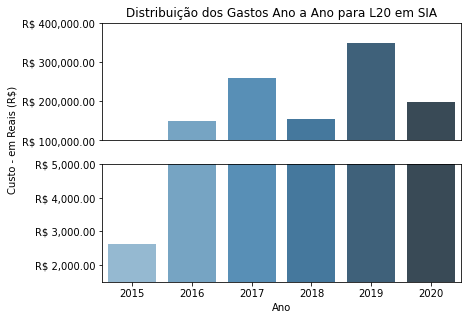

In [39]:
#fonte para plot do gráfico: https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)

ax1 = sns.barplot(x="Ano", y="Custo", data=df,palette="Blues_d", ax=ax1)

# we basically do the same thing again for the second plot
ax2 = sns.barplot(x="Ano", y="Custo", data=df,palette="Blues_d", ax=ax2)

ax1.set_ylim(100000, 400000)
ax2.set_ylim(1500, 5000)

# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)

# by default, each part will get its own "Latency in ms" label, but we want to set a common for the whole figure
# first, remove the y label for both subplots
ax1.set_ylabel("")
ax2.set_ylabel("")
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(-0.1, 0.55, 'Custo - em Reais (R$) ', va='center', rotation='vertical')

# let's put some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

ylabels1 = ['R$ ' + '{:,.2f}'.format(y) for y in ax1.get_yticks()]
ylabels2 = ['R$ ' + '{:,.2f}'.format(y) for y in ax2.get_yticks()]
ax1.set_yticklabels(ylabels1)
ax2.set_yticklabels(ylabels2)

# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.12, right=0.95, bottom=0.05, top=0.95)

ax1.set_title("Distribuição dos Gastos Ano a Ano para L20 em SIA")
plt.show()

# FAZER ANÁLISE DE CUSTO ANO A ANO MAS POR FAIXA ETÁRIA

In [40]:
# colcoar aqui as infos da faixa etária recebida por e-mail

# FAZER ANÁLISE DE CUSTO ANO A ANO MAS POR GRUPOS DE PROCEDIMENTO AGORA

In [41]:
COLS_2 = ['PA_PROC_ID','PA_VLR_TOT', 'PA_CMP']
DF_L20_SIA_CUSTO_PROC = DF_L20_SIA[COLS_2]

In [42]:
# Criamos um array para transformar essas datas misturadas de meses e anos para somente o ano em questão.
# datas_PA_CMP é: DF_L20_SIA_CUSTO.groupby(['PA_CMP']).sum().index

datas_PA_CMP = [201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606,
201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702,201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710,
201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806,201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902,
201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910,201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006,
202007, 202008, 202009, 202010, 202011, 202012]

str_array_datas = []

for item in datas_PA_CMP:
  item = str(item)
  str_array_datas.append(item)

str_array = []

for data in DF_L20_SIA_CUSTO_PROC['PA_CMP'].values:
  data = str(data)
  if data.startswith('2015'):
    n_data = '2015'
    str_array.append(n_data)
  elif data.startswith('2016'):
    n_data = '2016'
    str_array.append(n_data)
  elif data.startswith('2017'):
    n_data = '2017'
    str_array.append(n_data)
  elif data.startswith('2018'):
    n_data = '2018'
    str_array.append(n_data)
  elif data.startswith('2019'):
    n_data = '2019'
    str_array.append(n_data)
  elif data.startswith('2020'):
    n_data = '2020'
    str_array.append(n_data)

# substituindo a coluna por esse array que acabamos de criar
DF_L20_SIA_CUSTO_PROC['PA_CMP'] = str_array

# transformando a coluna de código do procedimento em tipo inteiro
DF_L20_SIA_CUSTO_PROC = DF_L20_SIA_CUSTO_PROC.astype({'PA_PROC_ID': int})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
#DF_L20_SIA_CUSTO_PROC.groupby(['PA_PROC_ID']).count()

Como existem 252 procedimentos únicos diferentes na tabela SIA criamos grupos maiores de procedimentos para termos uma visão de quais grupos são mais frequentes ao lado do nome do procedimento específico

*   Se durante a análise alguns grupos se destacarem mais que outros podemos abrir estes grupos e verificar qual o nome do procedimento em destaque;
*   Para tal análise no diretório raiz deve estar presente o arquivo: "dicionario_procedimentos_unicos_grupos.csv" onde cada procedimento foi analisado um a um para encaixá-los dentro de um grupo maior.



In [44]:
df_proc_grupos = pd.read_csv("dicionario_procedimentos_unicos_grupos.csv")

In [45]:
df_2015 = DF_L20_SIA_CUSTO_PROC[DF_L20_SIA_CUSTO_PROC['PA_CMP']=='2015']
df_2015_top10 = df_2015.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).tail(10).reset_index()
###
df_2016 = DF_L20_SIA_CUSTO_PROC[DF_L20_SIA_CUSTO_PROC['PA_CMP']=='2016']
df_2016_top10 = df_2016.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).tail(10).reset_index()
###
df_2017 = DF_L20_SIA_CUSTO_PROC[DF_L20_SIA_CUSTO_PROC['PA_CMP']=='2017']
df_2017_top10 = df_2017.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).tail(10).reset_index()
###
df_2018 = DF_L20_SIA_CUSTO_PROC[DF_L20_SIA_CUSTO_PROC['PA_CMP']=='2018']
df_2018_top10 = df_2018.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).tail(10).reset_index()
###
df_2019 = DF_L20_SIA_CUSTO_PROC[DF_L20_SIA_CUSTO_PROC['PA_CMP']=='2019']
df_2019_top10 = df_2019.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).tail(10).reset_index()
###
df_2020 = DF_L20_SIA_CUSTO_PROC[DF_L20_SIA_CUSTO_PROC['PA_CMP']=='2020']
df_2020_top10 = df_2020.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).tail(10)

# Os dataframes que possuem as infos de procedimentos e custos para cada ano são:

`*   df_2015; df_2016; df_2017; df_2018; df_2019 e df_2020`

# Os dataframes que possuem as infos dos top 10 gastos (valor) e quais são esses procedimentos são:

`*   df_2015_top10; df_2016_top10; df_2017_top10; df_2018_top10; df_2019_top10 e df_2020_top10`







## ABAIXO A CARACTERIZAÇÃO ANO A ANO DOS TOP 10 PROCEDIMENTOS COM MAIOR CUSTO E O NOME DO PROCEDIMENTO:

In [58]:
custo_2015 = pd.merge(df_2015_top10, df_proc_grupos, on="PA_PROC_ID")
custo_2016 = pd.merge(df_2016_top10, df_proc_grupos, on="PA_PROC_ID")
custo_2017 = pd.merge(df_2017_top10, df_proc_grupos, on="PA_PROC_ID")
custo_2018 = pd.merge(df_2018_top10, df_proc_grupos, on="PA_PROC_ID")
custo_2019 = pd.merge(df_2019_top10, df_proc_grupos, on="PA_PROC_ID")
custo_2020 = pd.merge(df_2020_top10, df_proc_grupos, on="PA_PROC_ID")

# Visualização gráfica do custo total e o custo dos top 10 procedimentos de cada ano

In [64]:
dftotal = DF_L20_SIA_CUSTO.groupby(['PA_CMP']).sum().reset_index()

In [65]:
row0 = round(float(custo_2015['PA_VLR_TOT'].sum()),2)
row1 = round(float(custo_2016['PA_VLR_TOT'].sum()),2)
row2 = round(float(custo_2017['PA_VLR_TOT'].sum()),2)
row3 = round(float(custo_2018['PA_VLR_TOT'].sum()),2)
row4 = round(float(custo_2019['PA_VLR_TOT'].sum()),2)
row5 = round(float(custo_2020['PA_VLR_TOT'].sum()),2)

series_top10_proc = [row0,row1,row2,row3,row4,row5]

# criando uma nova coluna neste dataframe - a coluna possui os gastos ano a ano dos respectivos top 10 procedimentos
dftotal['top10_proc'] = series_top10_proc

In [67]:
dftotal.head()

,PA_CMP,PA_VLR_TOT,top10_proc
0,2015,2613.20,2613.20
1,2016,148734.17,136264.43
2,2017,258998.74,236740.00
3,2018,153481.54,139090.89
4,2019,348951.22,329846.92


### O ano de 2015 parece ter poucos dados, pois o top 10 de procedimentos possui apenas 3, na verdade. 
*   Este valor já representa o valor total, sendo assim vamos remover este ano destas análises - outlier



In [69]:
dftotal = dftotal.loc[1::]
dftotal # tabela final a ser utilizada para gerar o gráfico

,PA_CMP,PA_VLR_TOT,top10_proc
1,2016,148734.17,136264.43
2,2017,258998.74,236740.00
3,2018,153481.54,139090.89
4,2019,348951.22,329846.92
5,2020,198925.52,185890.66


#### Gráfico da distribuição de gastos em SIA ano a ano

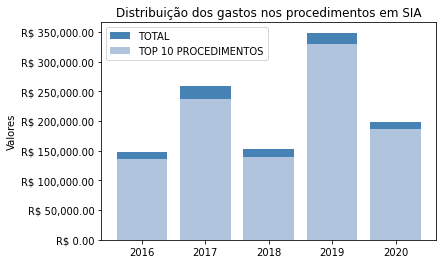

In [70]:
labels = dftotal.PA_CMP
total = dftotal.PA_VLR_TOT
top10 = dftotal.top10_proc

fig, ax = plt.subplots()
ax.bar(labels, total, label='TOTAL', color = 'steelblue')
ax.bar(labels, top10, label='TOP 10 PROCEDIMENTOS',color = 'lightsteelblue')

ylabels1g = ['R$ '+'{:,.2f}'.format(y_values) for y_values in ax.get_yticks()]
ax.set_yticklabels(ylabels1g)

ax.set_ylabel('Valores')
ax.set_title('Distribuição dos gastos nos procedimentos em SIA')
ax.legend()

plt.show()

In [70]:
# Pegando os procedimentos mais frequentes de cada ano

group15 = df_2015.groupby(['PA_PROC_ID'],sort=False).count().reset_index()
g15 = group15.sort_values(by='PA_VLR_TOT').tail(10)
f15 = pd.merge(g15, df_proc_grupos, on="PA_PROC_ID")
###

group16 = df_2016.groupby(['PA_PROC_ID'],sort=False).count().reset_index()
g16 = group16.sort_values(by='PA_VLR_TOT').tail(10)
f16 = pd.merge(g16, df_proc_grupos, on="PA_PROC_ID")
###

group17 = df_2017.groupby(['PA_PROC_ID'],sort=False).count().reset_index()
g17 = group17.sort_values(by='PA_VLR_TOT').tail(10)
f17 = pd.merge(g17, df_proc_grupos, on="PA_PROC_ID")
###

group18 = df_2018.groupby(['PA_PROC_ID'],sort=False).count().reset_index()
g18 = group18.sort_values(by='PA_VLR_TOT').tail(10)
f18 = pd.merge(g18, df_proc_grupos, on="PA_PROC_ID")
###

group19 = df_2019.groupby(['PA_PROC_ID'],sort=False).count().reset_index()
g19 = group19.sort_values(by='PA_VLR_TOT').tail(10)
f19 = pd.merge(g19, df_proc_grupos, on="PA_PROC_ID")
###

group20 = df_2020.groupby(['PA_PROC_ID'],sort=False).count().reset_index()
g20 = group20.sort_values(by='PA_VLR_TOT').tail(10)
f20 = pd.merge(g20, df_proc_grupos, on="PA_PROC_ID")

# *   Segue comparativo dos **procedimentos mais frequentes** e seus custos versus os **procedimentos mais custosos** (top 10)

- Para 2015 não esperamos ver diferenças entre os procedimentos mais frequentes e o mais custosos pois tem apenas 3 grupos de procedimentos. Iremos remover novamente das análises



In [120]:
v16 = df_2016.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).reset_index()
fv16 = pd.merge(f16, v16, on="PA_PROC_ID")

v17 = df_2017.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).reset_index()
fv17 = pd.merge(f17, v17, on="PA_PROC_ID")

v18 = df_2018.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).reset_index()
fv18 = pd.merge(f18, v18, on="PA_PROC_ID")

v19 = df_2019.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).reset_index()
fv19 = pd.merge(f19, v19, on="PA_PROC_ID")

v20 = df_2020.groupby(['PA_PROC_ID']).sum().sort_values(by=['PA_VLR_TOT']).reset_index()
fv20 = pd.merge(f20, v20, on="PA_PROC_ID")

In [167]:
proc = pd.concat([fv16, fv17, fv18, fv19, fv20])
procs = [str(nome) for nome in proc['grupo_proc']]
mylist = list(dict.fromkeys(procs)) 

In [168]:
mylist #lista de procedimentos mais frequentes

['CONSULTAS E ACOMPANHAMENTOS MÉDICOS',
 'AJUDA DE CUSTO E REMUNERAÇÃO PARA DESLOCAMENTO',
 'ATENDIMENTO DE URGÊNCIA E PRONTO ATENDIMENTO',
 'ANATOMO-PATOLÓGICO',
 'BIOPSIAS E COLETA DE MATERIAL PARA EXAMES',
 'AVALIAÇÃO ANTROPOMÉTRICA',
 'MEDICAMENTOS NA ATENÇÃO ESPECIALIZADA']

In [169]:
proc = pd.concat([custo_2016, custo_2017, custo_2018, custo_2019, custo_2020])
procs_custo = [str(nome) for nome in proc['grupo_proc']]
mylist_custo = list(dict.fromkeys(procs_custo)) 

In [170]:
mylist_custo #lista de procedimentos com maior gasto

['EXAMES DE IMAGEM',
 'AJUDA DE CUSTO E REMUNERAÇÃO PARA DESLOCAMENTO',
 'ATENDIMENTO DE URGÊNCIA E PRONTO ATENDIMENTO',
 'BIOPSIAS E COLETA DE MATERIAL PARA EXAMES',
 'ANATOMO-PATOLÓGICO',
 'EXAME HEMOPATIAS',
 'CONSULTAS E ACOMPANHAMENTOS MÉDICOS',
 'CURATIVOS, CAUTERIZAÇÕES, AUTONOMIZAÇÃO DE RETALHO E SUTURAS',
 'IMUNOHISTOQUÍMICA']

In [121]:
l1 = round(float(fv16['PA_VLR_TOT_y'].sum()),2)
l2 = round(float(fv17['PA_VLR_TOT_y'].sum()),2)
l3 = round(float(fv18['PA_VLR_TOT_y'].sum()),2)
l4 = round(float(fv19['PA_VLR_TOT_y'].sum()),2)
l5 = round(float(fv20['PA_VLR_TOT_y'].sum()),2)

freq_top10_proc = [l1, l2, l3, l4, l5]

# criando uma nova coluna neste dataframe - a coluna possui os gastos ano a ano dos respectivos top 10 procedimentos mais frequentes
dftotal['top10_freq_proc'] = freq_top10_proc

## Tabela com custos dos procedimentos mais frequentes, apenas os mais custosos e o respectivo ano:

In [127]:
dftotal

,PA_CMP,PA_VLR_TOT,top10_proc,top10_freq_proc
1,2016,148734.17,136264.43,59943.57
2,2017,258998.74,236740.00,81634.48
3,2018,153481.54,139090.89,87217.54
4,2019,348951.22,329846.92,230565.16
5,2020,198925.52,185890.66,102388.57


In [126]:
round(dftotal[['PA_VLR_TOT','top10_proc','top10_freq_proc']].mean(),2)

PA_VLR_TOT         221818.24
top10_proc         205566.58
top10_freq_proc    112349.86
dtype: float64

## Gráfico comparativo dos gastos relacionados aos procedimentos em L20 acima explorados

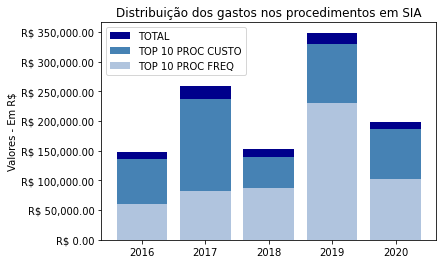

In [124]:
labels = dftotal.PA_CMP
total = dftotal.PA_VLR_TOT
top10 = dftotal.top10_proc
freq_top10 = dftotal.top10_freq_proc

fig, ax = plt.subplots()
ax.bar(labels, total, label='TOTAL', color = 'darkblue')
ax.bar(labels, top10, label='TOP 10 PROC CUSTO',color = 'steelblue')
ax.bar(labels, freq_top10, label='TOP 10 PROC FREQ',color = 'lightsteelblue')


ylabels_custo = ['R$ '+'{:,.2f}'.format(ycusto) for ycusto in ax.get_yticks()]
ax.set_yticklabels(ylabels_custo)

ax.set_ylabel('Valores - Em R$')
ax.set_title('Distribuição dos gastos nos procedimentos em SIA')
ax.legend()

plt.show()